DataSet Source: https://www.kaggle.com/camnugent/sandp500

https://new.censusatschool.org.nz/wp-content/uploads/2013/02/Rachel-Passmore-TS-data-sets-2.zip
        
        

Assignment 4: Question 1

Prediciting future values using Random Forest Regression:

In [1]:
import os
cwd = os.getcwd()
cwd
os.chdir("D:\data science")

In [2]:
import pandas as pd
nyc = pd.read_csv('ks.csv')
nyc=nyc.drop("Date",axis  =1)
nyc=nyc.drop("Name",axis = 1)

In [3]:
nyc.head()

,ID,open,high,low,close,volume
0,1,67.7142,68.4014,66.8928,67.8542,158168416
1,2,68.0714,69.2771,67.6071,68.5614,129029425
2,3,68.5014,68.9114,66.8205,66.8428,151829363
3,4,66.7442,67.6628,66.1742,66.7156,118721995
4,5,66.3599,67.3771,66.2885,66.6556,88809154


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [5]:
nyc.columns

Index(['ID', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [6]:
pd.concat([nyc.close, nyc.close.shift(-1)], axis=1)

,close,close
0,67.8542,68.5614
1,68.5614,66.8428
2,66.8428,66.7156
3,66.7156,66.6556
4,66.6556,65.7371
5,65.7371,65.7128
6,65.7128,64.1214
7,64.1214,63.7228
8,63.7228,64.4014
9,64.4014,63.2571


In [7]:
X = nyc[[x for x in nyc.columns]]


In [8]:
X = X.drop(X.index[1158:1259])

In [9]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157
ID,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,1.000000e+01,...,1149.00,1150.00,1151.00,1152.00,1153.00,1154.00,1155.00,1156.00,1157.00,1158.00
open,6.771420e+01,6.807140e+01,6.850140e+01,6.674420e+01,6.635990e+01,6.697850e+01,6.587140e+01,6.538420e+01,6.371420e+01,6.417850e+01,...,163.80,163.64,164.80,163.75,162.71,162.09,160.86,160.50,162.61,159.87
high,6.840140e+01,6.927710e+01,6.891140e+01,6.766280e+01,6.737710e+01,6.716560e+01,6.610420e+01,6.538420e+01,6.416710e+01,6.451420e+01,...,163.89,164.52,164.94,164.25,162.99,162.24,161.15,162.05,163.96,159.96
low,6.689280e+01,6.760710e+01,6.682050e+01,6.617420e+01,6.628850e+01,6.570280e+01,6.483560e+01,6.411420e+01,6.325990e+01,6.379990e+01,...,162.61,163.48,163.63,160.56,160.52,160.36,158.53,159.89,158.77,157.91
close,6.785420e+01,6.856140e+01,6.684280e+01,6.671560e+01,6.665560e+01,6.573710e+01,6.571280e+01,6.412140e+01,6.372280e+01,6.440140e+01,...,163.35,164.00,164.05,162.08,161.91,161.26,158.63,161.50,160.86,159.65
volume,1.581684e+08,1.290294e+08,1.518294e+08,1.187220e+08,8.880915e+07,9.792463e+07,1.088540e+08,1.188914e+08,1.115968e+08,8.258382e+07,...,27269584.00,26785096.00,16591051.00,29536314.00,21651726.00,21928502.00,28611535.00,31580798.00,71714046.00,44907361.00


In [10]:
y = nyc.close.shift(-101).dropna()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [13]:
rf_model.score(X_test, y_test)

0.9944199842586355

78% Accuracy

Calculating Feature Importance:

In [14]:
import numpy as np

In [15]:
file= pd.read_csv("ks.csv")
file= file.drop("Date",axis = 1)
file= file.drop("Name",axis = 1)
x= pd.DataFrame(file)
y= pd.Series(file['close'])

In [16]:
y


0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
5        65.7371
6        65.7128
7        64.1214
8        63.7228
9        64.4014
10       63.2571
11       64.1385
12       63.5099
13       63.0571
14       61.4957
15       60.0071
16       61.5919
17       60.8088
18       61.5117
19       61.6742
20       62.5528
21       61.2042
22       61.1928
23       61.7857
24       63.3799
25       65.1028
26       64.9271
27       64.5828
28       64.6756
29       65.9871
          ...   
1229    170.5700
1230    170.6000
1231    171.0800
1232    169.2300
1233    172.2600
1234    172.2300
1235    173.0300
1236    175.0000
1237    174.3500
1238    174.3300
1239    174.2900
1240    175.2800
1241    177.0900
1242    176.1900
1243    179.1000
1244    179.2600
1245    178.4600
1246    177.0000
1247    177.0400
1248    174.2200
1249    171.1100
1250    171.5100
1251    167.9600
1252    166.9700
1253    167.4300
1254    167.7800
1255    160.5000
1256    156.49

In [17]:
y.values

array([ 67.8542,  68.5614,  66.8428, ..., 156.49  , 163.03  , 159.54  ])

In [18]:
file.head()

,ID,open,high,low,close,volume
0,1,67.7142,68.4014,66.8928,67.8542,158168416
1,2,68.0714,69.2771,67.6071,68.5614,129029425
2,3,68.5014,68.9114,66.8205,66.8428,151829363
3,4,66.7442,67.6628,66.1742,66.7156,118721995
4,5,66.3599,67.3771,66.2885,66.6556,88809154


In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_features, test_features, train_labels, test_labels = train_test_split(x.values, y.values, test_size = 0.25,
                                                                           random_state = 42)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rf = RandomForestRegressor(n_estimators= 10, random_state=42)

In [24]:
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [25]:
import numpy as np

In [26]:
predictions = rf.predict(test_features)

In [27]:
errors = abs(predictions - test_labels)

In [28]:
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.15


In [29]:
feature_list = list(x.columns)
feature_list

['ID', 'open', 'high', 'low', 'close', 'volume']

In [30]:
importances = list(rf.feature_importances_)


In [31]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]


In [32]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [33]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: close                Importance: 0.81
Variable: ID                   Importance: 0.08
Variable: low                  Importance: 0.06
Variable: high                 Importance: 0.05
Variable: open                 Importance: 0.0
Variable: volume               Importance: 0.0


Assignemnt 4: Q2: Selected a dataset and modeled it by guessing a pdf that matches its histogram. Then we found the most likely parameters of pdf using MLE.

Dataset: Monthwise visits to New Zealand from various countries across the globe.

Note: Dataset manipulated to decimal points by the author for study purpose

METHOD OF MOMENTS:

Gamma Distribution


In [35]:
import pandas as pd

In [36]:
precip = pd.read_csv("trial.csv", index_col=0, na_values='NA')
precip.head()

,Australia,Cook Islands,Fiji,Samoa,ChinaPRo,India,Thailand,UK,USA
Month,,,,,,,,,
1998M09,29.028,7.54,29.71,8.19,10.76,7.46,10.82,14.496,51.453333
1998M10,28.204,6.43,23.48,6.96,11.53,9.46,10.12,9.581,41.300000
1998M11,21.173,4.40,16.73,6.40,12.83,12.41,6.52,5.140,28.006667
1998M12,23.630,6.60,18.86,13.83,17.63,24.41,8.73,6.340,32.946667
1999M01,25.763,8.42,25.96,20.52,18.42,25.45,8.33,5.410,33.526667


In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Plotting Histograms


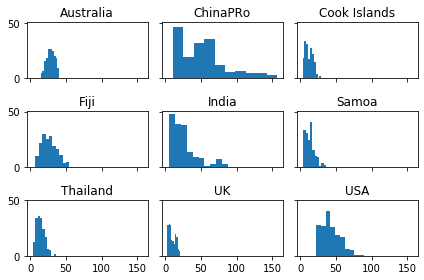

In [38]:
_ = precip.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

In [39]:
precip_mean = precip.mean()
precip_mean

Australia       28.766206
Cook Islands    12.215824
Fiji            26.674294
Samoa           13.570471
ChinaPRo        53.344529
India           26.078765
Thailand        14.522529
UK               9.642753
USA             42.705020
dtype: float64

In [40]:
precip_var = precip.var()
precip_var

Australia         36.419343
Cook Islands      30.831699
Fiji             115.612306
Samoa             42.165213
ChinaPRo        1141.301749
India            348.524768
Thailand          34.993241
UK                22.995160
USA              170.718623
dtype: float64

In [41]:
alpha_mom = (precip_mean**2)/(precip_var)
beta_mom =(precip_var)/(precip_mean)

In [42]:
alpha_mom, beta_mom

(Australia       22.721294
 Cook Islands     4.840030
 Fiji             6.154345
 Samoa            4.367526
 ChinaPRo         2.493327
 India            1.951373
 Thailand         6.026988
 UK               4.043576
 USA             10.682600
 dtype: float64, Australia        1.266046
 Cook Islands     2.523915
 Fiji             4.334222
 Samoa            3.107130
 ChinaPRo        21.394916
 India           13.364313
 Thailand         2.409583
 UK               2.384709
 USA              3.997624
 dtype: float64)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2477: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


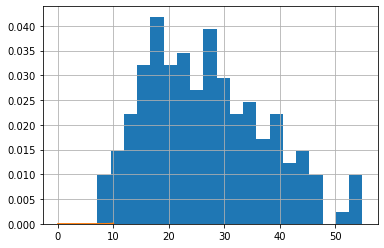

In [43]:
from scipy.stats.distributions import gamma

precip.Fiji.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2410: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


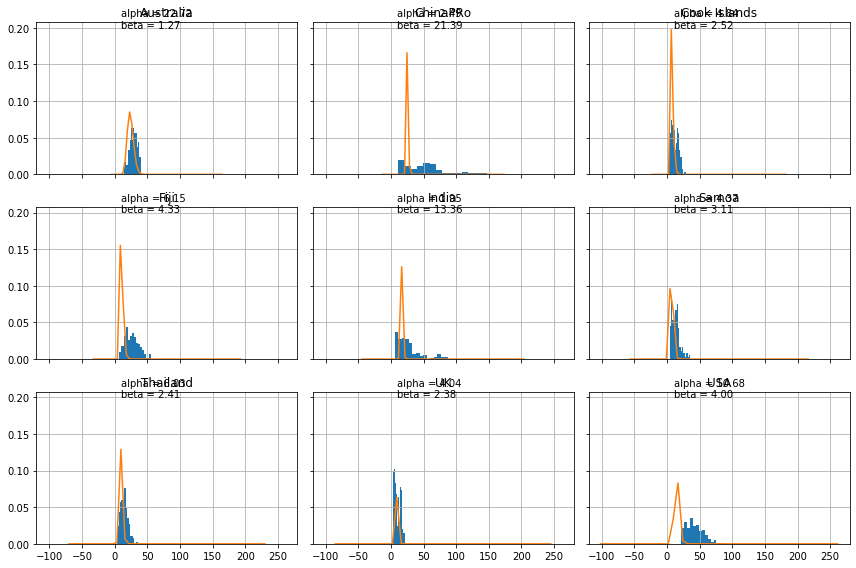

In [44]:
axs = precip.hist(normed=True, figsize=(12, 8), sharex=True, sharey=True, bins=15, grid=True)
for ax in axs.ravel():
    m = ax.get_title()
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))
plt.tight_layout()

MAXIMUM LIKELIHOOD ESTIMATION

Avoiding the math, a bettter model


In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
from scipy.optimize import newton

In [47]:
from scipy.special import psi, polygamma

dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

In [48]:
log_mean = precip.mean().apply(np.log)
mean_log = precip.apply(np.log).mean()

In [49]:
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean[-1], mean_log[-1]))
alpha_mle

11.181004172750377

In [50]:
beta_mle = alpha_mle/precip.mean()[-1]
beta_mle

0.26181943657747486

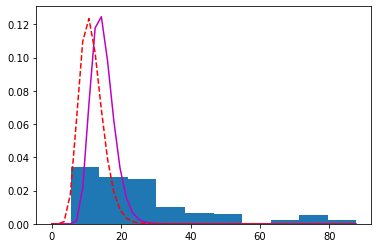

In [51]:
India = precip.India
India.hist(normed=True, bins=10, grid=False)
x = np.linspace(0, India.max())
plt.plot(x, gamma.pdf(x, alpha_mom[-1], beta_mom[-1]), 'm-')
plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--')

In [52]:
from scipy.stats import gamma

gamma.fit(precip.India)

(1.0929998394333613, 5.541828308398924, 18.789463678265147)

running test


In [53]:
import numpy as np
import scipy.stats as st
import statsmodels.datasets
import matplotlib.pyplot as plt
%matplotlib inline
data = statsmodels.datasets.heart.load_pandas().data

In [54]:
dist = st.expon
args = dist.fit(India)
args

(5.56, 20.518764705882358)

In [55]:
st.kstest(India, dist.cdf, args)

KstestResult(statistic=0.07561852524448548, pvalue=0.27214403353328415)

In [56]:
smax = India.max()
days = np.linspace(0., smax, 1000)

In [57]:
smean = India.mean()
rate = 1. / smean
rate

0.03834537453280673

In [58]:
dist_exp = st.expon.pdf(days, scale=1. / rate)
nbins = 30

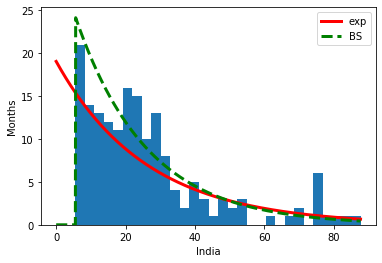

In [59]:
dist_fl = dist.pdf(days, *args)
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(India, nbins)
ax.plot(days, dist_exp * len(India) * smax / nbins,
        '-r', lw=3, label='exp')
ax.plot(days, dist_fl * len(India) * smax / nbins,
        '--g', lw=3, label='BS')
ax.set_xlabel("India")
ax.set_ylabel("Months")
ax.legend()